In [6]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares
from optimizer_optimated import Optimizer

In [7]:
ehrenfest = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Ehrenfest/ehrenfest.dat")
mash = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Data/mash_site77K.dat")

<function matplotlib.pyplot.show(close=None, block=None)>

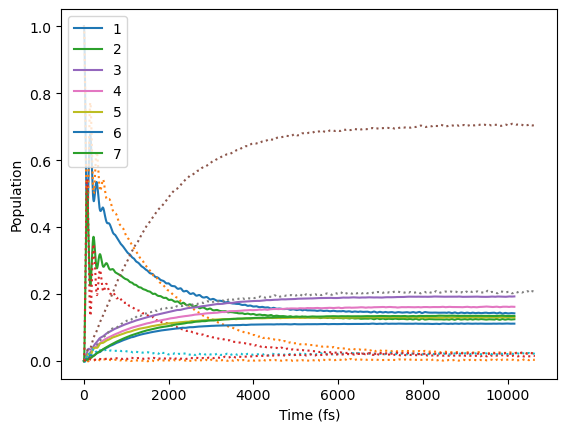

In [16]:
for i in range(1,8):
    plt.plot(ehrenfest[:,0],ehrenfest[:,i], label =f"{i}"), 
    plt.plot(mash[:,0],mash[:,i], ":")
plt.xlabel("Time (fs)")
plt.ylabel("Population")
plt.legend()
plt.show

# Exc Basis

1380.0


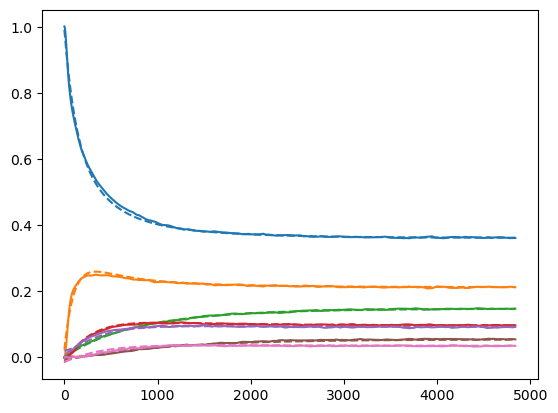

In [12]:

column_names = ["Time"]
site_data_path = "../Data/mash_exc300K.dat"
for i in range(1,8):
    column_names.append(str(i))
site_df = pd.read_csv(site_data_path, delimiter=" ", names=column_names)
site_df = site_df[(site_df.index % 10 == 0) | (site_df.index == len(site_df.index) - 1)]
site_data = site_df.values

eq_pop = site_df.values[-1,1:]
ns = len(eq_pop)

optimize_init = Optimizer(site_data,eq_pop,ns,initial_kappas=None)
all_kappas = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/scan_0_5000_exc_kappas.dat")
resid3 =np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/scan_0_5000_exc_resid3.dat")

kappa_opt = all_kappas[-1]
t1 = resid3[-1,0]
print(t1)
ls_data = site_data[site_data[:,0]<=t1]
p0 = ls_data[-1,1:]
time_left = ls_data[:,0]
time_right = site_data[site_data[:,0] > t1][:,0]

pop_left = optimize_init.predict(p0,time_left,direction='back',kappa=kappa_opt)
pop_right = optimize_init.predict(p0,time_right,direction='forward',kappa=kappa_opt)
pred_time = np.concatenate((time_left,time_right))
pred_pop = np.concatenate((pop_left,pop_right),axis=0)

plt.figure()
for i in range(7):
    c = "C%i"%i
    plt.plot(site_data[:,0],site_data[:,i+1],'-',color=c)
    plt.plot(pred_time,pred_pop[:,i],'--',color=c)

plt.show()

560.0


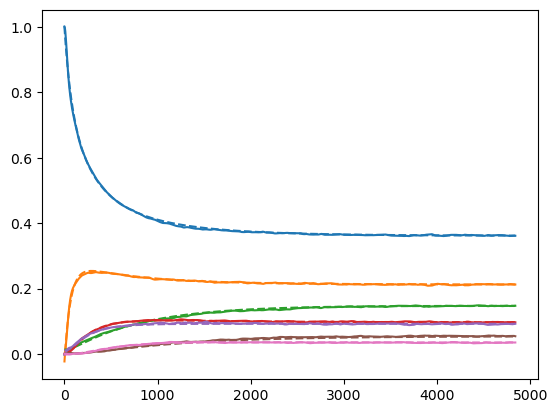

In [9]:
from optimizer_optimated import Optimizer
column_names = ["Time"]
site_data_path = "../Data/mash_exc300K.dat"
for i in range(1,8):
    column_names.append(str(i))
site_df = pd.read_csv(site_data_path, delimiter=" ", names=column_names)
site_df = site_df[(site_df.index % 10 == 0) | (site_df.index == len(site_df.index) - 1)]
site_data = site_df.values

eq_pop = site_df.values[-1,1:]
ns = len(eq_pop)
optimize_init = Optimizer(site_data,eq_pop,ns,initial_kappas=None)
all_kappas = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/scan_0_5000_exc_kappas.dat")
resid3 =np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/scan_0_5000_exc_resid3.dat")

kappa_opt = all_kappas[27]
t1 = resid3[27,0]
print(t1)
ls_data = site_data[site_data[:,0]<=t1]
p0 = ls_data[-1,1:]
time_left = ls_data[:,0]
time_right = site_data[site_data[:,0] > t1][:,0]

pop_left = optimize_init.predict(p0,time_left,direction='back',kappa=kappa_opt)
pop_right = optimize_init.predict(p0,time_right,direction='forward',kappa=kappa_opt)
pred_time = np.concatenate((time_left,time_right))
pred_pop = np.concatenate((pop_left,pop_right),axis=0)

plt.figure()
for i in range(7):
    c = "C%i"%i
    plt.plot(site_data[:,0],site_data[:,i+1],'-',color=c)
    plt.plot(pred_time,pred_pop[:,i],'--',color=c)
plt.show()

# Site 77K

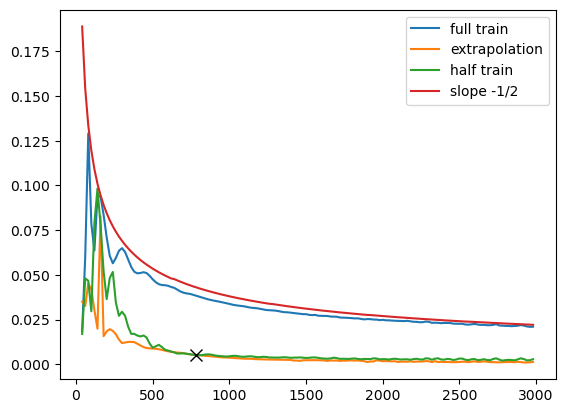

In [20]:
#Full Train
resid1 = np.loadtxt("C")
plt.plot(resid1[:,0],resid1[:,1], label = "full train")

resid2 =np.loadtxt("scan_0_5000_site77_resid2.dat")
plt.plot(resid2[:,0],resid2[:,1], label = "extrapolation")

resid3 =np.loadtxt("scan_0_5000_site77_resid3.dat")
plt.plot(resid3[:,0],resid3[:,1],label="half train")

neg = np.loadtxt("scan_0_5000_site77_neghalf.dat")
plt.plot(neg[:,0],1/np.sqrt(neg[:,1]),label="slope -1/2")


plt.legend()

plt.plot(resid3[37,0], resid3[37,1], 'x', markersize=8, color = 'black')

# #straight line of slope -1/2
# x = np.linspace(0,100,1500)
# y =-1/2*x
# plt.plot(x,y)

plt.show()

940.0


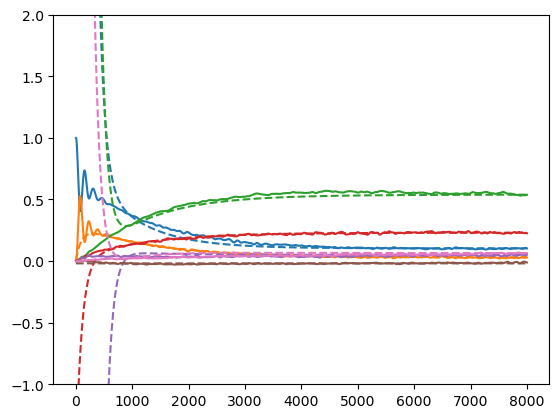

In [8]:
from optimizer_optimated import Optimizer
column_names = ["Time"]
site_data_path = "../Data/pop.out"
for i in range(1,8):
    column_names.append(str(i))
site_df = pd.read_csv(site_data_path, delimiter=" ", names=column_names)
site_df = site_df[(site_df.index % 10 == 0) | (site_df.index == len(site_df.index) - 1)]
site_data = site_df.values

eq_pop = site_df.values[-1,1:]
ns = len(eq_pop)
optimize_init = Optimizer(site_data,eq_pop,ns,initial_kappas=None)
all_kappas = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/scan_0_5000_wig_kappas.dat")
resid3 =np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/scan_0_5000_wig_resid3.dat")

kappa_opt = all_kappas[37]
t1 = resid3[37,0]
print(t1)
ls_data = site_data[site_data[:,0]<=t1]
p0 = ls_data[-1,1:]
time_left = ls_data[:,0]
time_right = site_data[site_data[:,0] > t1][:,0]

pop_left = optimize_init.predict(p0,time_left,direction='back',kappa=kappa_opt)
pop_right = optimize_init.predict(p0,time_right,direction='forward',kappa=kappa_opt)
pred_time = np.concatenate((time_left,time_right))
pred_pop = np.concatenate((pop_left,pop_right),axis=0)

plt.figure()
for i in range(7):
    c = "C%i"%i
    plt.plot(site_data[:,0],site_data[:,i+1],'-',color=c)
    plt.plot(pred_time,pred_pop[:,i],'--',color=c)

plt.ylim(-1,2)
plt.show()